In [351]:
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from __future__ import division
import pandas as pd
import numpy as np
import scipy.stats as stats
from StringIO import StringIO
from matplotlib import pyplot as plt
from os.path import join, exists, basename
from PIL import Image as pil_image
import re
import requests
import datetime


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Поглощение рассеяние:

http://vmede.org/sait/?page=30&id=Medbiofizika_fedorov_2008&menu=Medbiofizika_fedorov_2008

by number  
https://eol.jsc.nasa.gov/DatabaseImages/ISD/highres/AS11/AS11-40-5903.JPG  
https://www.lpi.usra.edu/resources/apollo/images/print/AS11/40/5903.jpg  
https://www.hq.nasa.gov/alsj/a11/AS11-40-5903HR.jpg  
http://tothemoon.ser.asu.edu/data_a70/AS11/processed/AS11-40-5903.png  
http://tothemoon.ser.asu.edu/data_a70/AS11/raw/AS11-40-5903.tif  

http://tothemoon.ser.asu.edu/gallery/apollo/AS12_Hasselblad%20(70%20mm)/list  
https://www.lpi.usra.edu/resources/apollo/  


## Картинки с "прожекторами"

In [116]:
with_sun = """
AS12-46-6739
AS12-46-6762
AS12-46-6763
AS12-46-6765
AS12-46-6766
AS12-46-6767
AS12-46-6768
AS12-46-6804
AS12-46-6805
AS12-46-6806  
AS12-47-6950
AS12-47-6951
AS12-47-6952
AS12-47-6971
AS12-47-6972
AS12-47-6996
AS12-47-6997
AS12-47-6998  
AS12-49-7214
AS12-49-7215
AS12-49-7245
AS12-49-7246
AS12-49-7297
AS12-49-7298  
AS12-53-7912
AS12-53-7925
AS12-53-7927
AS12-53-7944  

AS13-62-8955
AS13-62-8973  

AS14-64-9176
AS14-64-9177  
AS14-66-9247
AS14-66-9248
AS14-66-9282
AS14-66-9283
AS14-66-9304
AS14-66-9305
AS14-66-9306  
AS14-67-9368  

AS16-109-17853
AS16-109-17856  
AS16-110-18006  

AS17-134-20410
AS17-134-20411  
AS17-136-20699
AS17-136-20723
AS17-136-20762
AS17-136-20764
AS17-136-20818
AS17-136-20819  
AS17-147-22509
AS17-147-22507
AS17-147-22509
AS17-147-22512
AS17-147-22554
AS17-147-22580  
"""

near_sun = """
AS12-46-6764

AS17-142-21676
AS17-142-21690
AS17-142-21691
AS17-142-21737  
AS17-145-22162
AS17-145-22185  
AS17-146-22343
AS17-146-22378
AS17-146-22443  
AS17-147-22510
AS17-147-22555
"""

s = with_sun + near_sun
s

'\nAS12-46-6739\nAS12-46-6762\nAS12-46-6763\nAS12-46-6765\nAS12-46-6766\nAS12-46-6767\nAS12-46-6768\nAS12-46-6804\nAS12-46-6805\nAS12-46-6806  \nAS12-47-6950\nAS12-47-6951\nAS12-47-6952\nAS12-47-6971\nAS12-47-6972\nAS12-47-6996\nAS12-47-6997\nAS12-47-6998  \nAS12-49-7214\nAS12-49-7215\nAS12-49-7245\nAS12-49-7246\nAS12-49-7297\nAS12-49-7298  \nAS12-53-7912\nAS12-53-7925\nAS12-53-7927\nAS12-53-7944  \n\nAS13-62-8955\nAS13-62-8973  \n\nAS14-64-9176\nAS14-64-9177  \nAS14-66-9247\nAS14-66-9248\nAS14-66-9282\nAS14-66-9283\nAS14-66-9304\nAS14-66-9305\nAS14-66-9306  \nAS14-67-9368  \n\nAS16-109-17853\nAS16-109-17856  \nAS16-110-18006  \n\nAS17-134-20410\nAS17-134-20411  \nAS17-136-20699\nAS17-136-20723\nAS17-136-20762\nAS17-136-20764\nAS17-136-20818\nAS17-136-20819  \nAS17-147-22509\nAS17-147-22507\nAS17-147-22509\nAS17-147-22512\nAS17-147-22554\nAS17-147-22580  \n\nAS12-46-6764\n\nAS17-142-21676\nAS17-142-21690\nAS17-142-21691\nAS17-142-21737  \nAS17-145-22162\nAS17-145-22185  \nAS17-146-2234

In [131]:
df = pd.read_csv(StringIO(with_sun), sep=',', header=None)
df.columns = ['code']
df1 = df.assign(ring=True)

df = pd.read_csv(StringIO(near_sun), sep=',', header=None)
df.columns = ['code']
df2 = df.assign(ring=False)

df = pd.concat([df1, df2])

In [156]:
re_code = re.compile(r'AS(?P<mission>[\d]+)-(?P<magazine>[\d]+)-(?P<number>[\d]+)')

def parse_code(code='AS12-46-6739'):
    m =  re_code.match(code)
    assert m is not None
    res = [int(i) for i in m.groups()]
    return res

mmn_list = []
for i, row in df.iterrows():
    mmn_list.append(parse_code(row['code']))
mmn_list = np.array(mmn_list)

df = df.assign(mission=mmn_list[:, 0], magazine=mmn_list[:, 1], number=mmn_list[:, 2])

In [200]:
import utils

In [201]:
df.head()

,code,ring,magazine,mission,number
0,AS12-46-6739,True,46,12,6739
1,AS12-46-6762,True,46,12,6762
2,AS12-46-6763,True,46,12,6763
3,AS12-46-6765,True,46,12,6765
4,AS12-46-6766,True,46,12,6766


In [222]:
#url_templ = "https://eol.jsc.nasa.gov/DatabaseImages/ISD/highres/AS{mission}/{code}.JPG"

def download_rows(df, url_templ=url_templ, size='o'):
    for i, row in df.iterrows():
        code = row['code'].strip()
        print(i, len(df), code, end='... ')
        url = utils.get_image_url(title=code)
        if url is not None:
            fn_out = join('data', 'source', 'flickr', size, code + ".jpg")
            if not exists(fn_out):
                res = utils.download(url, fn_out)
                print(res)
            else:
                print('already downloaded')

In [223]:
download_rows(df)

0 69 AS12-46-6739... already downloaded
1 69 AS12-46-6762... already downloaded
2 69 AS12-46-6763... already downloaded
3 69 AS12-46-6765... already downloaded
4 69 AS12-46-6766... already downloaded
5 69 AS12-46-6767... already downloaded
6 69 AS12-46-6768... already downloaded
7 69 AS12-46-6804... already downloaded
8 69 AS12-46-6805... already downloaded
9 69 AS12-46-6806... already downloaded
10 69 AS12-47-6950... already downloaded
11 69 AS12-47-6951... already downloaded
12 69 AS12-47-6952... already downloaded
13 69 AS12-47-6971... already downloaded
14 69 AS12-47-6972... already downloaded
15 69 AS12-47-6996... already downloaded
16 69 AS12-47-6997... already downloaded
17 69 AS12-47-6998... already downloaded
18 69 AS12-49-7214... already downloaded
19 69 AS12-49-7215... already downloaded
20 69 AS12-49-7245... already downloaded
21 69 AS12-49-7246... already downloaded
22 69 AS12-49-7297... already downloaded
23 69 AS12-49-7298... already downloaded
24 69 AS12-53-7912... AS12

In [207]:
df_flickr_photos = pd.read_csv('flickr_photos.csv')

In [ ]:
df_flickr_photos[df_flickr_photos.title=='']

In [181]:
!ls ./data/source/ -1

AS12-46-6739.jpg
AS12-46-6762.jpg
AS12-46-6763.jpg
AS12-46-6764.jpg
AS12-46-6765.jpg
AS12-46-6766.jpg
AS12-46-6767.jpg
AS12-46-6768.jpg
AS12-46-6804.jpg
AS12-46-6805.jpg
AS12-47-6950.jpg
AS12-47-6951.jpg
AS12-47-6952.jpg
AS12-47-6971.jpg
AS12-47-6972.jpg
AS12-47-6996.jpg
AS12-47-6997.jpg
AS13-62-8955.jpg
AS17-134-20410.jpg
AS17-145-22162.jpg
AS17-146-22343.jpg
AS17-146-22378.jpg
AS17-147-22507.jpg
AS17-147-22509.jpg
AS17-147-22510.jpg
AS17-147-22512.jpg
AS17-147-22554.jpg
AS17-147-22555.jpg


In [226]:
df

,code,ring,magazine,mission,number
0,AS12-46-6739,True,46,12,6739
1,AS12-46-6762,True,46,12,6762
2,AS12-46-6763,True,46,12,6763
3,AS12-46-6765,True,46,12,6765
4,AS12-46-6766,True,46,12,6766
5,AS12-46-6767,True,46,12,6767
6,AS12-46-6768,True,46,12,6768
7,AS12-46-6804,True,46,12,6804
8,AS12-46-6805,True,46,12,6805
9,AS12-46-6806,True,46,12,6806


In [359]:
from IPython.core.display import display, HTML, Markdown

s = []
for i, row in df[df.ring==True].iterrows():
    code = row['code'].strip()
    url1 = utils.get_image_url(title=code, size='m', verbose=0)
    url2 = utils.get_image_url(title=code, size='o', verbose=0)
    if url1 is not None:
        photo_url = utils.get_image_url(title=code, size=None, verbose=0)
        
        bbcode = '[url={}][img]{}[/img][/url]\n[url={}]{}[/url]'.format(url2, url1, photo_url, code)
        s.append(bbcode)
s = '\n'.join(s)
print(s)

[url=https://c1.staticflickr.com/1/753/21700152225_abcb6512f0_o.jpg][img]https://c1.staticflickr.com/1/753/21700152225_4b895560db_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchive/21700152225/in/album-72157659081038325/]AS12-46-6739[/url]
[url=https://c1.staticflickr.com/1/5760/21688642292_5a4f4f64ee_o.jpg][img]https://c1.staticflickr.com/1/5760/21688642292_377dd64562_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchive/21688642292/in/album-72157659081038325/]AS12-46-6762[/url]
[url=https://c1.staticflickr.com/1/750/21700102725_1370454b6e_o.jpg][img]https://c1.staticflickr.com/1/750/21700102725_8899d6b168_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchive/21700102725/in/album-72157659081038325/]AS12-46-6763[/url]
[url=https://c1.staticflickr.com/1/720/21077396824_e030a7b2f3_o.jpg][img]https://c1.staticflickr.com/1/720/21077396824_cc8b7cc1e3_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchive/21077

In [360]:
s = []
for i, row in df[df.ring==False].iterrows():
    code = row['code'].strip()
    url1 = utils.get_image_url(title=code, size='m', verbose=0)
    url2 = utils.get_image_url(title=code, size='o', verbose=0)
    if url1 is not None:
        photo_url = utils.get_image_url(title=code, size=None, verbose=0)
        
        bbcode = '[url={}][img]{}[/img][/url]\n[url={}]{}[/url]'.format(url2, url1, photo_url, code)
        s.append(bbcode)
s = '\n'.join(s)
print(s)

[url=https://c1.staticflickr.com/1/5756/21079115373_af1cc8f581_o.jpg][img]https://c1.staticflickr.com/1/5756/21079115373_34fd2bca26_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchive/21079115373/in/album-72157659081038325/]AS12-46-6764[/url]
[url=https://c1.staticflickr.com/1/741/21638765142_a6d354177f_o.jpg][img]https://c1.staticflickr.com/1/741/21638765142_72d23a911f_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchive/21638765142/in/album-72157658582399900/]AS17-142-21676[/url]
[url=https://c1.staticflickr.com/1/5667/21638749762_36609c7b83_o.jpg][img]https://c1.staticflickr.com/1/5667/21638749762_a9a22b1c8a_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchive/21638749762/in/album-72157658582399900/]AS17-142-21690[/url]
[url=https://c1.staticflickr.com/1/5820/21650082235_011420d376_o.jpg][img]https://c1.staticflickr.com/1/5820/21650082235_48df80c59a_m.jpg[/img][/url]
[url=https://www.flickr.com/photos/projectapolloarchi

## Освещенность измерение

In [114]:
!ls AS*.jpg -1

AS12-46-6765.jpg
AS14-66-9305.jpg


In [6]:
fn = "AS12-46-6765.jpg"

In [685]:
def load_img(path):
    img = pil_image.open(path)
    return img


In [686]:
img = load_img(fn)

In [687]:
#img

In [688]:
w, h = img.size
w, h

(4080, 4080)

AS12-46-6765.jpg cropped:  x: 0-4080, y: 1100-1400  (0,0) - left upper corner


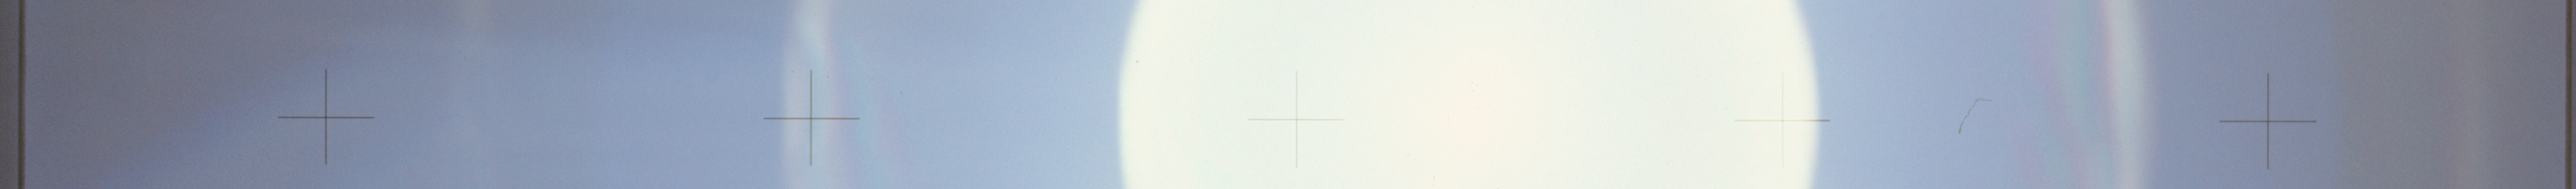

In [695]:
dh = 300
y = 1250
img2 = img.crop((0, y - dh // 2, w, y + dh // 2))
print(fn, "cropped:  x: {}-{}, y: {}-{}".format(0, w, y - dh // 2, y + dh // 2), " (0,0) - left upper corner")
img2.save('6762_crop.jpg')
img2


In [696]:
a = np.array(img2)

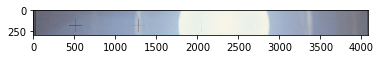

In [697]:
plt.imshow(a)
pass

In [698]:
a.shape

(300, 4080, 3)

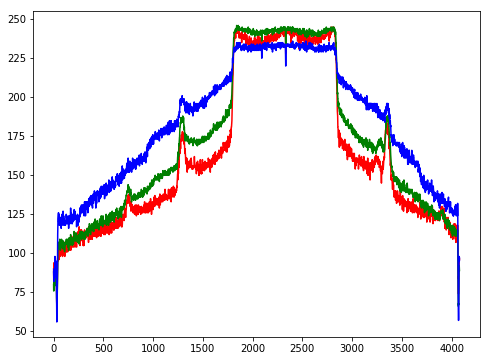

In [699]:
y = 10
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(a[y, :, 0], c='r')
ax.plot(a[y, :, 1], c='g')
ax.plot(a[y, :, 2], c='b')
fig.savefig('6762_crop_10_rgb.png')
pass

In [700]:
a = a.mean(axis=0)

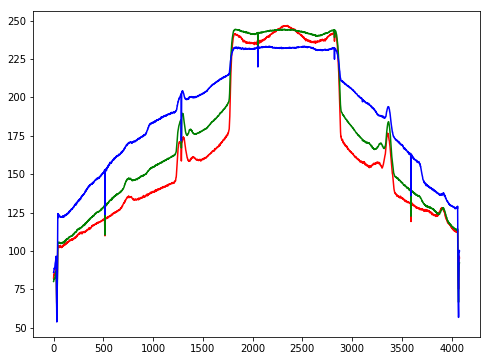

In [701]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(a[:, 0], c='r')
ax.plot(a[:, 1], c='g')
ax.plot(a[:, 2], c='b')

fig.savefig('6762_crop_rgb.png')

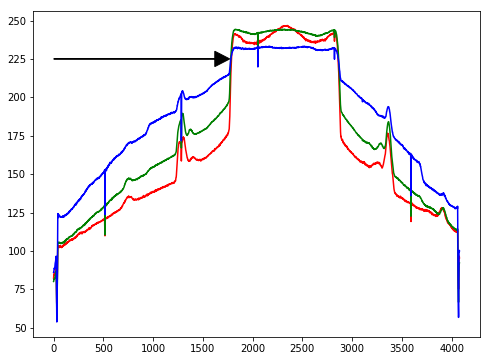

In [712]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(a[:, 0], c='r')
ax.plot(a[:, 1], c='g')
ax.plot(a[:, 2], c='b')


ax.arrow(0, 225, 1620, 0, head_width=10, head_length=150, fc='k', ec='k')

fig.savefig('6762_crop_rgb_labled_bak.png')

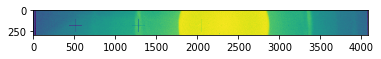

In [31]:
plt.imshow(a)

In [32]:
a = a.mean(axis=1)

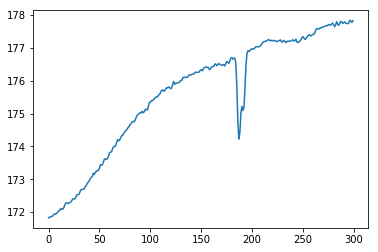

In [34]:
plt.plot(a)

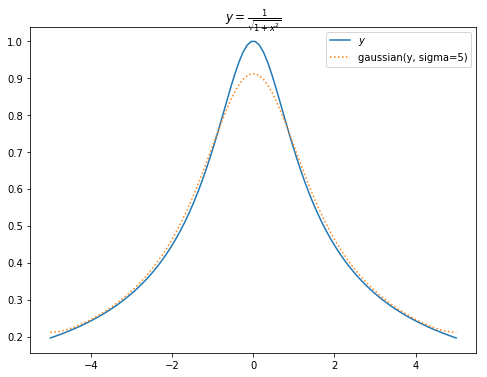

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(-5, 5, 100)
y = 1 / np.sqrt(1 + x**2)
ax.plot(x, y, label=r'$y$')
ax.plot(x, gaussian_filter(y, 5), label=r'gaussian(y, sigma=5)', ls=':')
ax.set_title(r'$y = \frac{1}{\sqrt{1 + x^2}}$')
ax.legend()
fig.savefig('bell.png')

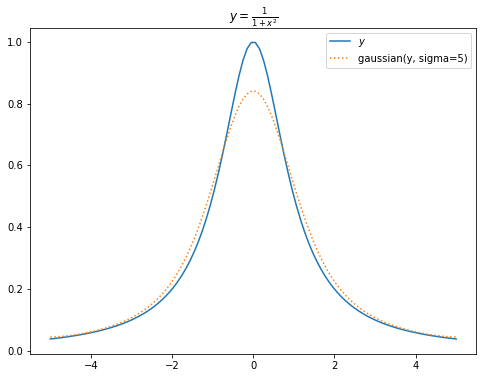

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(-5, 5, 100)
y = 1 / (1 + x**2)
ax.plot(x, y, label=r'$y$')
ax.plot(x, gaussian_filter(y, 5), label=r'gaussian(y, sigma=5)', ls=':')
ax.set_title(r'$y = \frac{1}{1 + x^2}$')
ax.legend()
fig.savefig('bell-2.png')

In [78]:
import scipy
from scipy.ndimage.filters import gaussian_filter

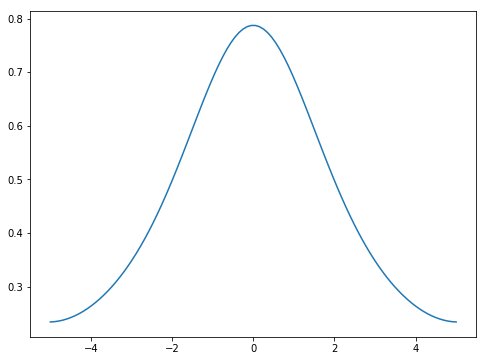

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))


fig.savefig('bell-gauss.png')



## Теория

<a href="https://www.numberempire.com/graphingcalculator.php?functions=(Коэфф.отражения%2C%20red%2C%200.5*(%20sin(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Fsin(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20%2B%20tan(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Ftan(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20)%20)%2C(Коэфф.пропускания%2C%20green%2C%201%20-%200.5*(%20sin(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Fsin(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20%2B%20tan(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Ftan(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20)%20)%2C(R*P%2C%20blue%2C%200.5*(%20sin(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Fsin(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20%2B%20tan(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Ftan(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20)%20*%20(%201%20-%200.5*(%20sin(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Fsin(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20%2B%20tan(%20rad(x)%20-%20asin(1.52*sin(rad(x)))%20)%5E2%2Ftan(%20rad(x)%20%2B%20asin(1.52*sin(rad(x)))%20)%5E2%20))%20)&xmin=0&xmax=50&ymin=0&ymax=1&var=x">Графики n=1.52</a>

(Коэфф.отражения, red, 0.5*( sin( rad(x) - asin(1.52*sin(rad(x))) )^2/sin( rad(x) + asin(1.52*sin(rad(x))) )^2 + tan( rad(x) - asin(1.52*sin(rad(x))) )^2/tan( rad(x) + asin(1.52*sin(rad(x))) )^2 ) ),(Коэфф.пропускания, green, 1 - 0.5*( sin( rad(x) - asin(1.52*sin(rad(x))) )^2/sin( rad(x) + asin(1.52*sin(rad(x))) )^2 + tan( rad(x) - asin(1.52*sin(rad(x))) )^2/tan( rad(x) + asin(1.52*sin(rad(x))) )^2 ) ),(R*P, blue, 0.5*( sin( rad(x) - asin(1.52*sin(rad(x))) )^2/sin( rad(x) + asin(1.52*sin(rad(x))) )^2 + tan( rad(x) - asin(1.52*sin(rad(x))) )^2/tan( rad(x) + asin(1.52*sin(rad(x))) )^2 ) * ( 1 - 0.5*( sin( rad(x) - asin(1.52*sin(rad(x))) )^2/sin( rad(x) + asin(1.52*sin(rad(x))) )^2 + tan( rad(x) - asin(1.52*sin(rad(x))) )^2/tan( rad(x) + asin(1.52*sin(rad(x))) )^2 )) )

https://ru.wikipedia.org/wiki/Закон_Снеллиуса  
https://ru.wikipedia.org/wiki/Формулы_Френеля  
http://ru.solverbook.com/spravochnik/koefficienty/koefficient-otrazheniya-sveta/   
https://ru.wikipedia.org/wiki/Тригонометрические_тождества  

$n$  - показатель преломления.  
$\alpha$ - угол (в стекле)  
$\beta$ - угол выхода из стекла.

$$n1 \sin \theta_1 =  n2 \sin \theta_2$$

$$ \sin \beta = n \sin(\alpha)$$
$$ \beta = \arcsin(n \sin(\alpha))$$

Коэффициент отражения

$$
R = \frac{1}{2}{R_p + R_s}
$$

Если в линейно поляризованной плоской волне вектор напряженности совершает колебания в плоскости падения волны, то такая волна называется _p-волной_.  
Если в линейно поляризованной плоской волне вектор напряженности совершает колебания в плоскости перпендикулярной к плоскости падения волны, то такая волна называется _s-волной_.

$$
R_p = \frac{\tan^2(\alpha - \beta)}{\tan^2(\alpha + \beta)}
$$

$$
R_s = \frac{\sin^2(\alpha - \beta)}{\sin^2(\alpha + \beta)}
$$

Коэффициента пропускания света (T) 

$$ R + T = 1$$

Здесь после каждого отржаение волна снова "считается" неполярихованной, но в общем  случае нужно  считать отдельно.





#### В зависимоссти от расстояния x

Не учитывая расстояние d (между пленкой и пластиной), 

$$ \tan (\alpha) = \frac{x}{2D} = z$$

Где
$D$ - толщина пластины.
$z$ - расстояние в масштабе толщины.

Откуда

$$
\sin \alpha = \frac{z}{\sqrt{1 + z^2}}
$$
$$
\cos \alpha = \frac{1}{\sqrt{1 + z^2}}
$$

(Все равно что угол падения (и освещенност) из мнимногого изобрнажение точки S.


$$
\sin \beta = n \sin \alpha = \frac{n z}{ \sqrt{1 + z ^2}}
$$

$$
\cos \beta = \sqrt {1 - n^2 sin^2 \alpha} = \sqrt{1 - \frac{n^2 z^2}{1 + z^2}} = \frac{\sqrt{1 + z^2 - n^2 z^2}}{\sqrt{1 + z^2}}
$$

$$
\sin (\alpha \pm \beta) = \sin\alpha \cos\beta  \pm \cos\alpha \sin \beta = \frac{z \sqrt{1 + z^2 - n^2 z^2} \pm n z }{1 + z^2}
$$

$$
\tan(\alpha \pm \beta) = \frac{\tan\alpha \pm \tan\beta}{1 \mp \tan \alpha \tan \beta}
$$


In [937]:
def Rsx(z, n=1.52):
    if z == 0:
        return ((n - 1) / (n + 1)) ** 2
    a = 1 + (1 - n**2) * z**2
    if a < 0:
        return 1
    a = z * np.sqrt(a)
    Rs =  (a - n*z) ** 2 / (a + n*z) ** 2
    return Rs

0.87357069726826542

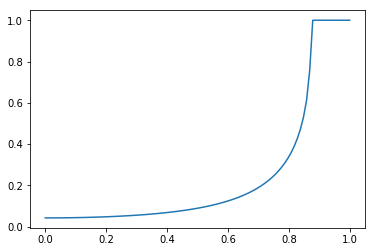

In [960]:
zz = np.linspace(0, 1, 100)
rsx = np.array([Rsx(z) for z in zz])
plt.plot(zz, rsx)


a_pred = np.arcsin(1 / n)
np.tan(a_pred)

In [961]:
Rsx(np.tan(a_pred) - 0.00000000000001), a_pred*180 / np.pi

(0.99999960590845527, 41.139510414899156)

In [840]:
n = 1.52

def calc_beta(alpha, n=n):
    """
    Вычисления угла преломнения.
    """
    s = np.sin(alpha) * n
    if s <= 1:
        return np.arcsin(s)
    else:
        return None

def frenel_R(alpha, beta, n=n, return_components=False):
    """
    Вычисление коэффициента отражения.
    
    Params:
        return_components : bool
        возращать коэффийиенты для s-волны и p-волны
    
    """
    if alpha == 0:
        R = ((n - 1) / (n + 1)) **2
        Rs = R
        Rp = R
    else:
        Rs = np.sin(alpha - beta) ** 2 / np.sin(alpha + beta) ** 2
        Rp = np.tan(alpha - beta) ** 2 / np.tan(alpha + beta) ** 2
        R = (Rs + Rp) / 2
    if return_components:
        return R, Rs, Rp
    else:
        return R
    
def calc_R(alpha, n=n):
    """
    Вычисление коэффициента отражения. (полного)
    """
  
    if alpha == 0:
        res = ((n - 1) / (n + 1)) **2
        return res

    beta = calc_beta(alpha, n=n)
    
    if beta is not None:
        R = frenel_R(alpha, beta)
        return R
    else:
        return None
    

In [816]:
alphas = np.linspace(0, np.pi / 2, 10000)

In [817]:
a_pred = np.arcsin(1 / n)
print("Предельный угол:", a_pred)

Предельный угол: 0.718019909398


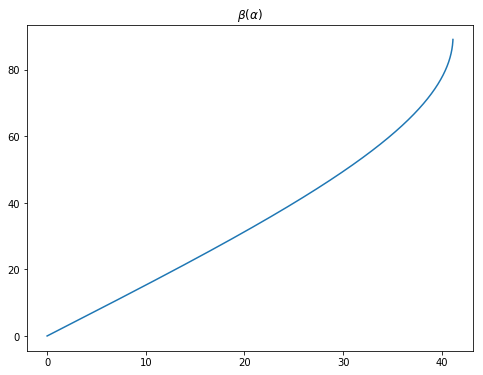

In [818]:
betas = np.array([calc_beta(alpha) for alpha in alphas]).astype(float)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(alphas * 180 / np.pi , betas  * 180 / np.pi)
ax.set_title(r'$\beta(\alpha)$')
pass

### Вариант когда источник в пластине

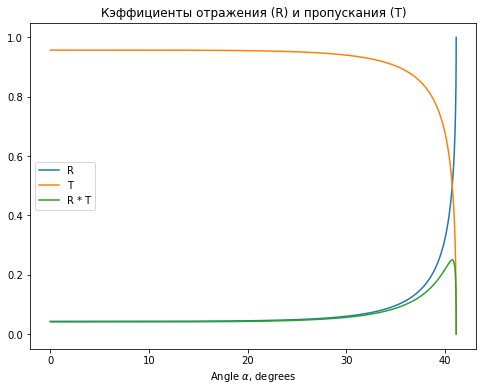

In [914]:
R = np.array([calc_R(alpha) for alpha in alphas]).astype(float)
T = 1 - R

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(u'Кэффициенты отражения (R) и пропускания (T)')
ax.plot(alphas * 180 / np.pi, R, label=u'R')
ax.plot(alphas * 180 / np.pi, T, label=u'T')
ax.plot(alphas * 180 / np.pi, R * T, label=u'R * T')
ax.grid(True, which='both')
ax.legend()
ax.set_xlabel(r"Angle $\alpha$, degrees")
fig.savefig('coeff_RT_alpha.png')
pass

### Поиск максимума

In [915]:
from scipy.optimize import minimize_scalar

a_pred = np.arcsin(1 / n)

def f(alpha, n=n):
    R = calc_R(alpha, n=n)
    if R is not None:
        T = 1 - R
        return - R * T

res = minimize_scalar(f, bounds=(0, a_pred-0.001),  method='bounded')

print(res.message)

print("Maximum: at {} radians, {} degrees\na_pred:  {} radians, {} degrees)".format(res.x, res.x * 180 / np.pi, a_pred, a_pred * 180 / np.pi))
print("Ratio  Maximum / a_pred:   {}".format(res.x / a_pred))
print("max value = ", -f(res.x))

Solution found.
Maximum: at 0.711075564366 radians, 40.741628753 degrees
a_pred:  0.718019909398 radians, 41.1395104149 degrees)
Ratio  Maximum / a_pred:   0.990328478442
max value =  0.249999999804


### Вариант когда источник находится вне стекла

In [866]:
# углы входа
gammas = np.linspace(0, np.pi / 2, 1000)

In [867]:
def calc_entrance(gamma, n=n):
    """
    Calculate angle, R, T by gamma.
    """
    alpha = np.arcsin(np.sin(gamma) / n)
    
    R = frenel_R(gamma, alpha)
    T = 1 - R
    
    return alpha, R, T

In [868]:
calc_entrance(0)

(0.0, 0.042579994960947345, 0.9574200050390527)

In [869]:
calc_entrance(0.0001)

(6.5789473622020336e-05, 0.042579994960947352, 0.95742000503905267)

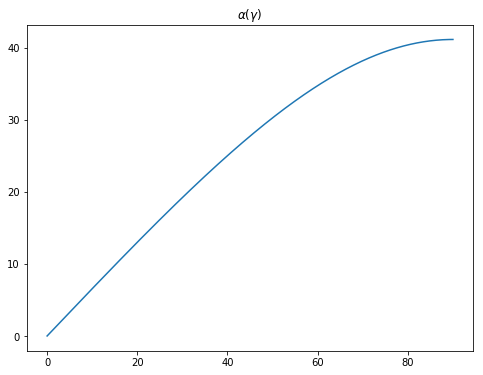

In [870]:
alphas = np.array([calc_entrance(gamma)[0] for gamma in gammas])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(gammas * 180 / np.pi , alphas  * 180 / np.pi)
ax.set_title(r'$\alpha(\gamma)$')
pass

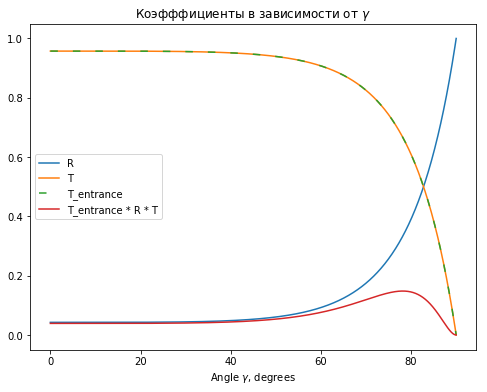

In [911]:
a = np.array([calc_entrance(gamma) for gamma in gammas])
alphas = a[:, 0]
R_entrance_list = a[:, 1]
T_entrance_list = a[:, 2]

R = np.array([calc_R(alpha) for alpha in alphas]).astype(float)
T = 1 - R

fig, ax = plt.subplots(figsize=(8, 6))

x = gammas * 180 / np.pi
ax.plot(x, R, label=u'R')
ax.plot(x, T, label=u'T')
ax.plot(x, T_entrance_list, label=u'T_entrance', ls=(0, (5, 10)))

ax.plot(x, T_entrance_list * R * T, label=u'T_entrance * R * T')
ax.legend()
ax.set_title(u'Коэфффициенты в зависимости от $\gamma$')
ax.set_xlabel(r"Angle $\gamma$, degrees")

fig.savefig('coeff_TRT_gamma.png')
pass


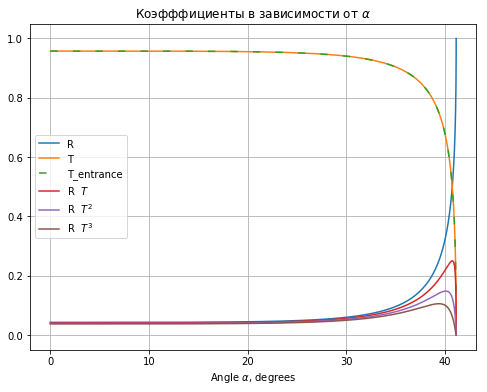

In [928]:
fig, ax = plt.subplots(figsize=(8, 6))

x = alphas * 180 / np.pi
ax.plot(x, R, label=u'R')
ax.plot(x, T, label=u'T')
ax.plot(x, T_entrance_list, label=u'T_entrance', ls=(0, (5, 10)))

ax.plot(x, R * T, label=u'R  $T$')
ax.plot(x, R * T ** 2, label=u'R  $T^2$')
ax.plot(x, R * T ** 3, label=u'R  $T^3$')

ax.legend()
ax.set_title(ur'Коэфффициенты в зависимости от $\alpha$')
ax.set_xlabel(r"Angle $\alpha$, degrees")
ax.grid(True, which='both')

fig.savefig('coeff_RT2_alpha.png')


### Поиск максимума

In [921]:
from scipy.optimize import minimize_scalar

a_pred = np.arcsin(1 / n)

def f(alpha, n=n):
    R = calc_R(alpha, n=n)
    if R is not None:
        T = 1 - R
        return - R * T * T * T

res = minimize_scalar(f, bounds=(0, a_pred-0.001),  method='bounded')

print(res.message)

print("Maximum: at {} radians, {} degrees\na_pred:  {} radians, {} degrees)".format(res.x, res.x * 180 / np.pi, a_pred, a_pred * 180 / np.pi))
print("Ratio  Maximum / a_pred:   {}".format(res.x / a_pred))
print("max value = ", -f(res.x))

Solution found.
Maximum: at 0.687345933906 radians, 39.3820210783 degrees
a_pred:  0.718019909398 radians, 41.1395104149 degrees)
Ratio  Maximum / a_pred:   0.957279770252
max value =  0.105468749997


## Ход лучей (SVG) в пластине

In [421]:
from IPython.core.display import display, HTML, Markdown, SVG
display(HTML("<style>.container { width:80% !important; }</style>"))

In [668]:
svg = """<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   version="1.1"
   id="svg2"
   viewBox="0 0 1400 400"
   height="400"
   width="1400"
   style="background-color: white;"
   >

  <defs>
    <marker
       style="overflow:visible;"
       id="middle"
       refX="0.0"
       refY="0.0"
       orient="auto">
      <path
         transform="scale(0.5) rotate(180) translate(-10,0)"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1;fill:#000000;fill-opacity:0.3;stroke-opacity:0.3;"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         id="path4890" />
    </marker>
  </defs>

  <g transform="translate(0, -250) scale(2)">
      <!-- film -->
      <rect x="100" y="302" width="500" height="17" fill="none" stroke='gray'/>
      <text x="620" y="312" fill="gray">film</text>

      <!-- plate -->
      <rect x="100" y="260" width="500" height="40" fill="none" stroke='green'/>
      <text x="620" y="280" fill="green">plate</text>
      
      <!-- S -->
      <circle cx="300" cy="302" r="3" />
      <text x="300" y="315" fill="gray" text-anchor='middle'>S</text>
      
      <!-- beam -->
      <!-- Sx -->
      <path d="m 300,300 10,-20 10,-20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle)" />
      <text x="320" y="255" fill="black" text-anchor='middle'>x</text>

      <!-- xx' -->
      <path d="m 320,260 10,20 10,20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.7;" />
      <text x="340" y="315" fill="black" text-anchor='middle'>x'</text>
      
      <!-- x_out -->
      <path d="m 320,260 15,-10 15,-10" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.3;" />

      <!-- x'x'' -->
      <path d="m 340,300 10,-20 10,-20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.49;" />
      <text x="360" y="255" fill="black" text-anchor='middle'>x''</text>
      
      <!-- x''_out -->
      <path d="m 360,260 15,-10 15,-10" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.15;" />
      
      
      <!-- angles -->
      <path d="m 320,260 0,20" style="fill:none;stroke:#000000;stroke-width:1px;opacity:0.7;" stroke-dasharray="1 3"/>
      <text x="317" y="280" text-anchor='middle' style="font-size: 10pt">α</text>
      
      <path d="m 320,260 0,-20" style="fill:none;stroke:#000000;stroke-width:1px;opacity:0.7;" stroke-dasharray="1 3"/>
      <text x="327" y="250" text-anchor='middle' style="font-size: 10pt">β</text>
      
      <!-- beam end -->

  </g>
  
</svg>

"""


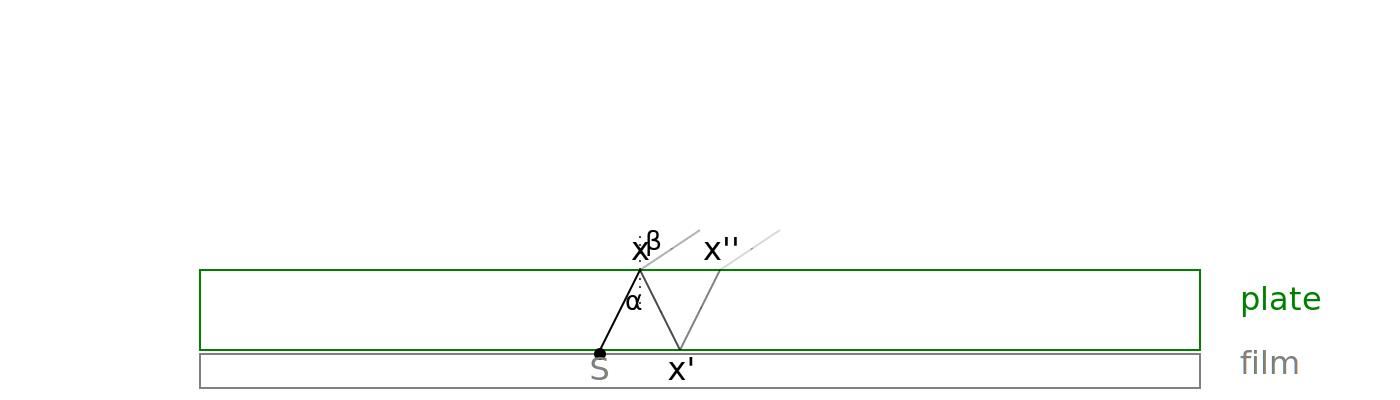

In [669]:
SVG(svg)

In [670]:
with open("rays-1.svg", 'w') as f:
    f.write(svg)

In [671]:
!rsvg rays-1.svg rays-1.png

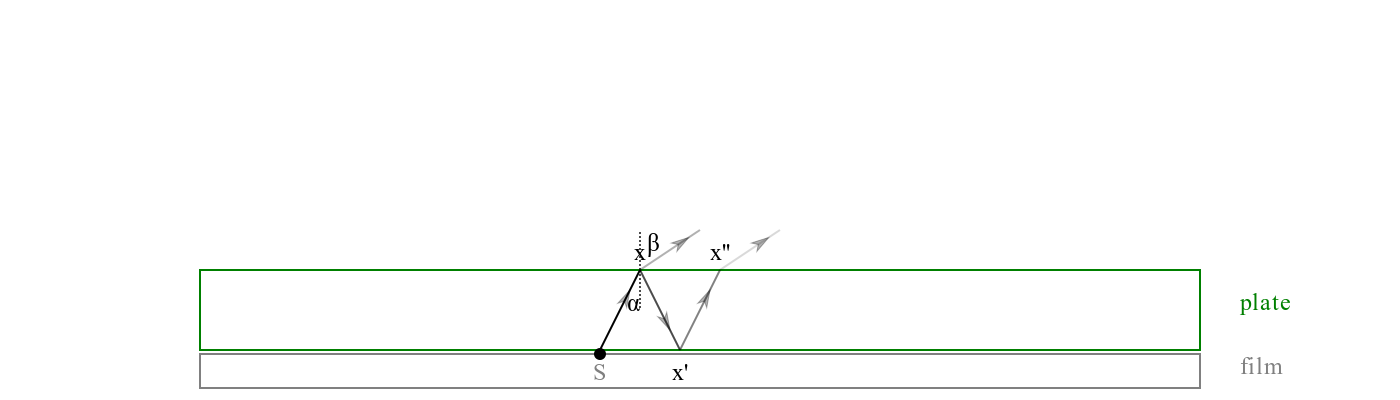

In [672]:
img = pil_image.open('rays-1.png')
img

$$
\tan \alpha = \frac{x}{D}
$$
$$
\alpha = \arctan\left(\frac{x}{D}\right)
$$

https://ru.wikipedia.org/wiki/Закон_Снеллиуса

$$n \sin \alpha = \sin \beta$$

$$ \sin \arctan (k) = \frac{k}{\sqrt{k^2 + 1}}$$
<a href="https://www.wolframalpha.com/input/?i=sin(arctan(x))">https://www.wolframalpha.com/input/?i=sin(arctan(x))</a>


$$ \sin \alpha = \frac{x/D}{\sqrt{(x/D)^2 + 1}} = \frac{x}{\sqrt{x^2 + D^2}}$$

$$ \sin \beta = n \frac{x}{\sqrt{x^2 + D^2}}$$

In [673]:
re_beam = re.compile('<!-- beam -->(?P<beam>[.]+)<!-- beam end -->', re.MULTILINE | re.DOTALL)
re_beam = re.compile(r'<\!-- beam -->(?P<beam>.+)<\!-- beam end -->', re.MULTILINE | re.DOTALL)

In [674]:
m = re_beam.search(svg)
m

In [675]:
print(m.group('beam'))


      <!-- Sx -->
      <path d="m 300,300 10,-20 10,-20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle)" />
      <text x="320" y="255" fill="black" text-anchor='middle'>x</text>

      <!-- xx' -->
      <path d="m 320,260 10,20 10,20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.7;" />
      <text x="340" y="315" fill="black" text-anchor='middle'>x'</text>
      
      <!-- x_out -->
      <path d="m 320,260 15,-10 15,-10" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.3;" />

      <!-- x'x'' -->
      <path d="m 340,300 10,-20 10,-20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.49;" />
      <text x="360" y="255" fill="black" text-anchor='middle'>x''</text>
      
      <!-- x''_out -->
      <path d="m 360,260 15,-10 15,-10" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.15;" />
      
      
      <!-- ang

In [676]:
n = 1.6
x = 30
sin_b = n * x / np.sqrt(x**2 + D**2)
sin_b

0.95999999999999996

In [677]:
name = 'c'
x = 10
half = x / 2
half_out = 1.4 * x / 2
x0 = 300
D = 40
n = 1.6


lines = []

def append_lines(lines, name='c', x=10, n=n):

    half = x / 2
    half_out = 1.4 * x / 2
    
    sin_b = n * x / np.sqrt(x**2 + D**2)
    
    
    cos_b = None
    tan_b = None
    half_out = None
    if sin_b <= 1:
        cos_b = np.sqrt(1 - sin_b**2)
        tan_b = sin_b / cos_b
        half_out = 10 * tan_b

        
    #print(sin_b, cos_b, tan_b, half_out)

    lines.append("<!-- S{} -->".format(name))
    line = """<path d="m 300,300 {half},-20 {half},-20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle)" />"""
    line = line.format(**{'half': half})
    lines.append(line)
    line = """<text x="{x}" y="255" fill="black" text-anchor='middle'>{name}</text>"""
    line = line.format(**{'x': x0 + x, 'name': name})
    lines.append(line)


    lines.append("<!-- {name}{name}' -->".format(**{'name':name}))
    line = """<path d="m {x},260 {half},20 {half},20" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.7;" />"""
    line = line.format(**{'x': x0 + x, 'half': half})
    lines.append(line)
    if x != 0:
        line = """<text x="{x}" y="315" fill="black" text-anchor='middle'>{name}'</text>"""
        line = line.format(**{'x': x0 + 2 * x, 'name': name})
        lines.append(line)

    if half_out is not None:
        lines.append("<!-- {name}_out' -->".format(**{'name':name}))
        line = """<path d="m {x},260 {half_out},-10 {half_out},-10" style="fill:none;stroke:#000000;stroke-width:1px;marker-mid:url(#middle);opacity:0.3;" />"""
        line = line.format(**{'x': x0 + x, 'half_out': half_out})
        lines.append(line)

    
append_lines(lines, name='a', x=0)
append_lines(lines, name='b', x=10)
append_lines(lines, name='c', x=20)
append_lines(lines, name='e', x=D * np.tan(np.arcsin(1/n) - 0.000001))
append_lines(lines, name='f', x=40)

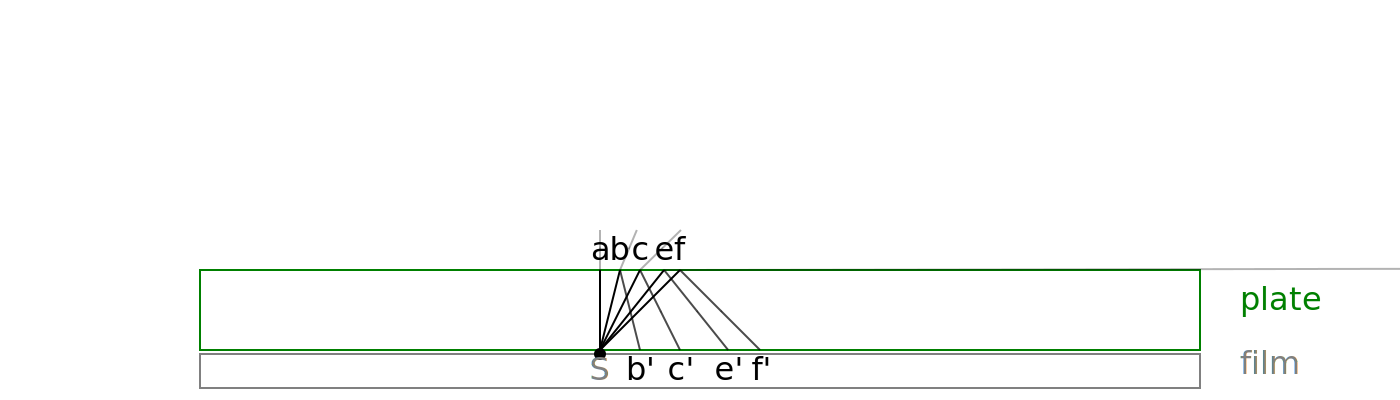

In [678]:
s_lines = "\n".join(lines)
svg2 = re_beam.sub(s_lines, svg)
SVG(svg2)

In [679]:
with open("rays-2.svg", 'w') as f:
    f.write(svg2)

In [680]:
!rsvg rays-2.svg rays-2.png

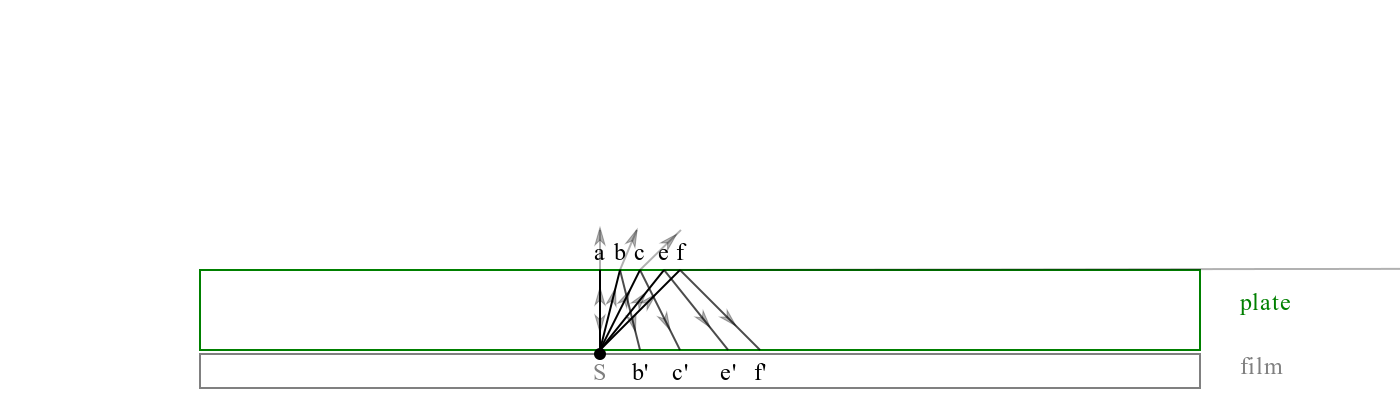

In [681]:
img = pil_image.open('rays-2.png')
img

In [1007]:
max([0, 1, 3])

3